## Bubble Plot of Ride Sharing Data

In [19]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



city = "data/city_data.csv"
ride = "data/ride_data.csv"

city_data = pd.read_csv(city)
ride_data = pd.read_csv(ride)

city_and_ride=pd.DataFrame(ride_data.loc[:,["city","fare","driver_count", "type"]])

city_and_ride = pd.merge(ride_data, city_data, on='city', how='inner')
city_and_ride.head()




,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


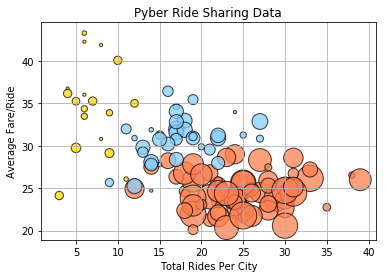

In [32]:
# Obtaining x and y coordinates for the three city types
urban_city= city_and_ride.loc[city_and_ride["type"] == "Urban"].groupby([city_and_ride["city"]])
rural_city= city_and_ride.loc[city_and_ride["type"] == "Rural"].groupby([city_and_ride["city"]])
suburban_city= city_and_ride.loc[city_and_ride["type"] == "Suburban"].groupby([city_and_ride["city"]])


x_axis_urban = urban_city["ride_id"].count()
x_axis_rural = rural_city["ride_id"].count()
x_axis_suburban = suburban_city["ride_id"].count()

y_axis_urban = urban_city["fare"].mean()
y_axis_rural = rural_city["fare"].mean()
y_axis_suburban = suburban_city["fare"].mean()

size_urban = urban_city["driver_count"].mean()
size_rural = rural_city["driver_count"].mean()
size_suburban = suburban_city["driver_count"].mean()

plt.scatter(x_axis_urban, y_axis_urban, label = "Urban", s=size_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_axis_rural, y_axis_rural, label = "Rural", s=size_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_axis_suburban, y_axis_suburban, label = "Suburban", s=size_suburban * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

plt.xlabel("Total Rides Per City")
plt.ylabel("Average Fare/Ride")
plt.title("Pyber Ride Sharing Data")



plt.savefig('Bubble.png')
plt.show()

## Total Fares by City Type

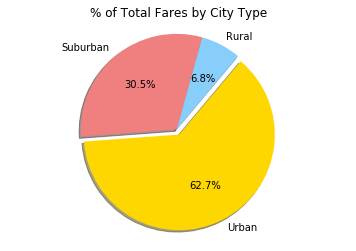

In [27]:
# Calculate Type Percents
Pie_type= city_and_ride.groupby(["type"])
total_fare = Pie_type["fare"].sum()

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.06)
colors = ["lightskyblue", "lightcoral", "gold"]
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)
plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.savefig('plot.png')
plt.show()

## Total Rides by City Type

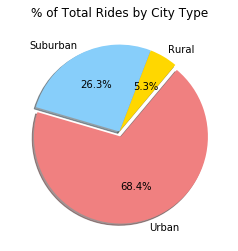

In [28]:
rides_total = Pie_type['ride_id'].count()
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.06)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)
plt.title("% of Total Rides by City Type")
plt.savefig('plot2.png')
plt.show()

## Total Drivers by City Type

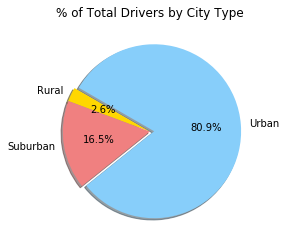

In [30]:

driver_type = city_data.groupby(['type'])
total_driver = driver_type['driver_count'].sum()
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.05)
colors = ["gold", "lightcoral", "lightskyblue"]
plt.pie(total_driver, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.savefig('plot3.png')
plt.show()